**Full Name:** Mahdi Saieedi



# Bootstrap

In [2]:
!hostname

user01


In [3]:
# %load_ext autoreload
# %autoreload 2

## Install

In [109]:
!pip install -U scikit-learn umap-learn

     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/88.2 kB ? eta -:--:--━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/88.2 kB ? eta -:--:--━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/88.2 kB ? eta -:--:--━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/88.2 kB 337.0 kB/s eta 0:00:01━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/88.2 kB 337.0 kB/s eta 0:00:01━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/88.2 kB 337.0 kB/s eta 0:00:01━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/88.2 kB 337.0 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 41.0/88.2 kB 147.7 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 61.4/88.2 kB 218.4 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 71.7/88.2 kB 220.7 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 71.7/88.2 kB 220.7 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 71.7/88.2 kB 220.7 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 205.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... do

In [5]:
!pip install torch torchvision torchaudio 

In [6]:
!pip install git+https://github.com/NightMachinery/PyNight.git

  Cloning https://github.com/NightMachinery/PyNight.git to /tmp/pip-req-build-h06kbskt
  Running command git clone --filter=blob:none --quiet https://github.com/NightMachinery/PyNight.git /tmp/pip-req-build-h06kbskt
  Resolved https://github.com/NightMachinery/PyNight.git to commit f8909d49503b41fe3982fdca97f1def36113c54b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [7]:
!pip install -U icecream 

In [8]:
!pip install -U torchinfo

In [9]:
!pip install jax jaxlib matplotlib

## Utils

In [1]:
from pynight.common_torch import TorchModelMode

In [2]:
# from torchsummary import summary
from torchinfo import summary

In [3]:
import torch

In [4]:
from icecream import ic

In [5]:
import jax

def torch_shape_get(input):
    def h_shape_get(x):
        return x.dtype, x.shape

    return jax.tree_map(h_shape_get, input)

# Denoising Autoencoder
In this notebook, you are going to build and train a denoising autoencoder. The purpose of an autoencoder, a form of neural network, is to develop codings for data. 

An autoencoder has two parts: an encoder and a decoder. The encoder modifies the input data and produces a representation for the input in a smaller dimension, and the decoding function reconstructs the input data from the encoded representation. 

A denoising autoencoder is an autoencoder that gets noisy data as input and tries to produce the denoised output for that input.

In [6]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

**For this question, it's highly recommended to use a CUDA-enabled environment.**
We'll check for the availability of GPU and set `device` accordingly.

In [7]:
torch.cuda.is_available()

True

In [8]:
torch.cuda.device_count()

1

In [9]:
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
device

device(type='cuda')

## Preparing the data
You'll use [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST) dataset to train your DAE.

ic| tmp.shape: torch.Size([28, 28, 1])


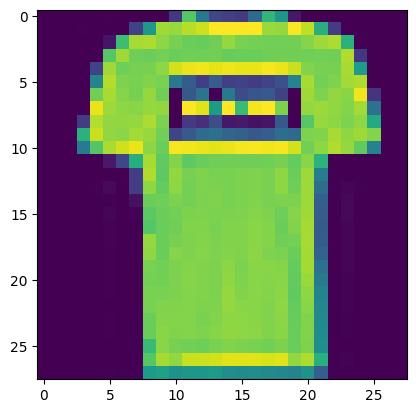

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [10]:
fm_train_set = datasets.FashionMNIST(root='./', train=True, download=True, transform=transforms.ToTensor())
fm_test_set = datasets.FashionMNIST(root='./', train=False, download=True, transform=transforms.ToTensor())

# For both the `fm_train_set` and `fm_test_set` only keep the 
# images and leave out the labels.
# Also, normalize the values to be between [0, 1].
##############################
# Your code goes here (5 points)
train_imgs = fm_train_set.data
train_imgs = train_imgs.float() / 255

test_imgs = fm_test_set.data
test_imgs = test_imgs.float() / 255
##############################

tmp = train_imgs[1].unsqueeze(0).permute(1, 2, 0)
ic(tmp.shape)
plt.imshow(tmp)
plt.show()
print(train_imgs.shape, test_imgs.shape)

In [11]:
torch_shape_get(fm_train_set.targets), fm_train_set.targets

((torch.int64, torch.Size([60000])), tensor([9, 0, 0,  ..., 3, 0, 5]))

In [12]:
fm_train_set.data.min(), fm_train_set.data.max()

(tensor(0, dtype=torch.uint8), tensor(255, dtype=torch.uint8))

In [13]:
torch_shape_get(fm_train_set.data)

(torch.uint8, torch.Size([60000, 28, 28]))

In [14]:
torch_shape_get(fm_test_set.data)

(torch.uint8, torch.Size([10000, 28, 28]))

In [15]:
torch_shape_get(train_imgs)

(torch.float32, torch.Size([60000, 28, 28]))

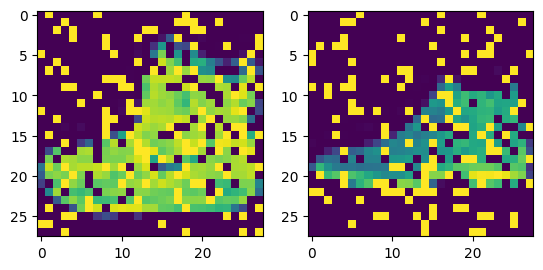

In [16]:
# For each image in our training and test sets,
# create a noisy version of the image.
# We'll use these noisy images as input data for the
# dataset we're going to create. The labels of this dataset
# would be the original images.
##############################
# Your code goes here (10 points)
def noisify_normal(imgs):
    noise = 0.3 * np.random.randn(*imgs.shape)
    noisy_imgs = imgs + noise
    noisy_imgs = np.clip(noisy_imgs, 0, 1)
    return noisy_imgs


def noisify_binomial(imgs):
    noise_factor = 1
    noise = (
        np.random.choice([-1, 0, 1], size=imgs.shape, p=[0.15, 0.7, 0.15])
        * noise_factor
    ).astype('float32')
    noisy_imgs = imgs + noise
    noisy_imgs = np.clip(noisy_imgs, 0, 1)
    return noisy_imgs


noisify = noisify_binomial
noisy_train_imgs = noisify(train_imgs)
noisy_test_imgs = noisify(test_imgs)
##############################
f = plt.figure()
f.add_subplot(1, 2, 1)
plt.imshow(noisy_train_imgs[0])
f.add_subplot(1, 2, 2)
plt.imshow(noisy_test_imgs[0])
plt.show()

In [17]:
torch_shape_get(noisy_train_imgs)

(torch.float32, torch.Size([60000, 28, 28]))

In [18]:
train_imgs[0].shape

torch.Size([28, 28])

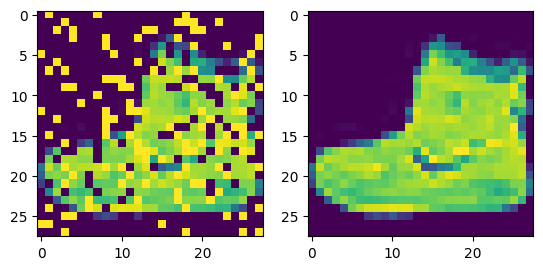

In [19]:
# Now we want to construct our new training and test sets.
# To do so, you'll use the noisy images you've created for each set
# as input for the new dataset and the original Fashion MNIST images as labels.

# Construct `training_set` (data, label) pairs.
##############################
# Your code goes here (10 points)
def create_dataset(noisy_imgs, imgs):
    return list(zip(noisy_imgs, imgs))

train_set = create_dataset(noisy_train_imgs, train_imgs)
##############################

f = plt.figure()
f.add_subplot(1, 2, 1)
plt.imshow(train_set[0][0]) 
f.add_subplot(1, 2, 2)
plt.imshow(train_set[0][1])
plt.show()

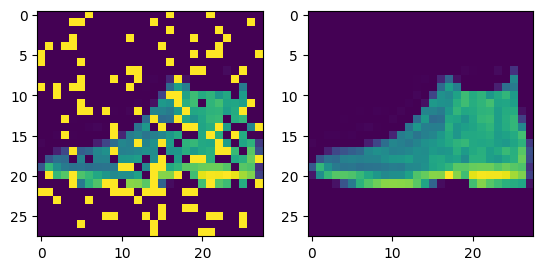

In [20]:
# Construct `test_set` (data, label) pairs.
##############################
# Your code goes here (5 points)
test_set = create_dataset(noisy_test_imgs, test_imgs)
##############################

f = plt.figure()
f.add_subplot(1, 2, 1)
plt.imshow(test_set[0][0]) 
f.add_subplot(1, 2, 2)
plt.imshow(test_set[0][1])
plt.show()

In [21]:
# Finally, create DataLoaders for the datasets.
# Use a batch size of 128 and enable shuffling.
##############################
# Your code goes here (5 points)
batch_size = 128
# batch_size = 2048
# batch_size = 2**16
ic(batch_size)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)
test_loader_b1 = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=True)
##############################

train_loader, test_loader

ic| batch_size: 128


(<torch.utils.data.dataloader.DataLoader at 0x7f1a3a191750>,
 <torch.utils.data.dataloader.DataLoader at 0x7f1a3a0496c0>)

## Creating the Model


In this part, you're going to create the DAE model.

In [70]:
# The encoder takes the input and outputs the `encoded representation`.
# Create the encoder using nn.Sequential (You can use the architecture 
# shown in this cell's output).
# Use Conv2d layers followed by ReLU.
# After conv2d layers, flatten the data and use linear layers to
# smoothly transform the output from conv2d layers into the encoded space.
# Set the encoded space dimensions to 10 * 1.
# Sequential(
#   (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
#   (1): ReLU(inplace=True)
#   (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
#   (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
#   (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
#   (5): ReLU(inplace=True)
#   (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
#   (7): ReLU(inplace=True)
#   (8): Flatten(start_dim=1, end_dim=-1)
#   (9): Linear(in_features=288, out_features=128, bias=True)
#   (10): ReLU(inplace=True)
#   (11): Linear(in_features=128, out_features=64, bias=True)
#   (12): ReLU(inplace=True)
#   (13): Linear(in_features=64, out_features=10, bias=True)
# )
##############################
# Your code goes here (15 points)

encoder = nn.Sequential(
    nn.Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
    nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)),
    nn.BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
    nn.ReLU(inplace=True),
    nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2)),
    nn.ReLU(inplace=True),
    nn.Flatten(start_dim=1, end_dim=-1),
    nn.Linear(in_features=288, out_features=128, bias=True),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=128, out_features=64, bias=True),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=64, out_features=10, bias=True)
)
##############################
encoder

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
  (7): ReLU(inplace=True)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=288, out_features=128, bias=True)
  (10): ReLU(inplace=True)
  (11): Linear(in_features=128, out_features=64, bias=True)
  (12): ReLU(inplace=True)
  (13): Linear(in_features=64, out_features=10, bias=True)
)

In [71]:
summary(encoder, (1, 1, 28, 28)) #: 1 is the channel

/home/user01/miniconda3/lib/python3.10/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/home/user01/miniconda3/lib/python3.10/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Conv2d: 1-1                            [1, 8, 14, 14]            80
├─ReLU: 1-2                              [1, 8, 14, 14]            --
├─BatchNorm2d: 1-3                       [1, 8, 14, 14]            16
├─Conv2d: 1-4                            [1, 16, 7, 7]             1,168
├─BatchNorm2d: 1-5                       [1, 16, 7, 7]             32
├─ReLU: 1-6                              [1, 16, 7, 7]             --
├─Conv2d: 1-7                            [1, 32, 3, 3]             4,640
├─ReLU: 1-8                              [1, 32, 3, 3]             --
├─Flatten: 1-9                           [1, 288]                  --
├─Linear: 1-10                           [1, 128]                  36,992
├─ReLU: 1-11                             [1, 128]                  --
├─Linear: 1-12                           [1, 64]                   8,256
├─

In [72]:
# The decoder takes the encoded data generated by the encoder
# and outputs the original input.
# Create the decoder using nn.Sequential.
# Reverse the operations used in encoder.
##############################
# Your code goes here (15 points)
decoder = nn.Sequential(
    nn.Linear(in_features=10, out_features=64, bias=True),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=64, out_features=128, bias=True),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=128, out_features=288, bias=True),
    nn.ReLU(inplace=True),
    nn.Unflatten(1, (32, 3, 3)),
    nn.ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2),
                    #    padding=1,
                    #    output_padding=1,
                       ),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
    nn.ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1)),
    nn.BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
    nn.ReLU(inplace=True),
    nn.ConvTranspose2d(8, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1)),
    nn.Sigmoid()
)
##############################

In [73]:
decoder

Sequential(
  (0): Linear(in_features=10, out_features=64, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=64, out_features=128, bias=True)
  (3): ReLU(inplace=True)
  (4): Linear(in_features=128, out_features=288, bias=True)
  (5): ReLU(inplace=True)
  (6): Unflatten(dim=1, unflattened_size=(32, 3, 3))
  (7): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
  (8): ReLU(inplace=True)
  (9): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (11): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): ConvTranspose2d(8, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (14): Sigmoid()
)

In [74]:
summary(decoder, (1, 10,))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 1, 28, 28]            --
├─Linear: 1-1                            [1, 64]                   704
├─ReLU: 1-2                              [1, 64]                   --
├─Linear: 1-3                            [1, 128]                  8,320
├─ReLU: 1-4                              [1, 128]                  --
├─Linear: 1-5                            [1, 288]                  37,152
├─ReLU: 1-6                              [1, 288]                  --
├─Unflatten: 1-7                         [1, 32, 3, 3]             --
├─ConvTranspose2d: 1-8                   [1, 16, 7, 7]             4,624
├─ReLU: 1-9                              [1, 16, 7, 7]             --
├─BatchNorm2d: 1-10                      [1, 16, 7, 7]             32
├─ConvTranspose2d: 1-11                  [1, 8, 14, 14]            1,160
├─BatchNorm2d: 1-12                      [1, 8, 14, 14]            16
├

In [75]:
torch.nn.Unflatten?

Init signature:
torch.nn.Unflatten(
    dim: Union[int, str],
    unflattened_size: Union[torch.Size, List[int], Tuple[int, ...], Tuple[Tuple[str, int]]],
) -> None
Docstring:     
Unflattens a tensor dim expanding it to a desired shape. For use with :class:`~nn.Sequential`.

* :attr:`dim` specifies the dimension of the input tensor to be unflattened, and it can
  be either `int` or `str` when `Tensor` or `NamedTensor` is used, respectively.

* :attr:`unflattened_size` is the new shape of the unflattened dimension of the tensor and it can be
  a `tuple` of ints or a `list` of ints or `torch.Size` for `Tensor` input;  a `NamedShape`
  (tuple of `(name, size)` tuples) for `NamedTensor` input.

Shape:
    - Input: :math:`(*, S_{\text{dim}}, *)`, where :math:`S_{\text{dim}}` is the size at
      dimension :attr:`dim` and :math:`*` means any number of dimensions including none.
    - Output: :math:`(*, U_1, ..., U_n, *)`, where :math:`U` = :attr:`unflattened_size` and
      :math:`\prod_{i=

Now we can construct the DAE by sequentially connecting the `encoder` and `decoder` networks.

In [76]:
DAE = nn.Sequential(encoder, decoder).to(device=device)

## Training the DAE

### Visualizing the Latent Space

During the training, we intend to visualize the *encoded representations* learned by the DAE every 10 epochs. You are going to use T-SNE for this purpose. In order to do so, you have to pass the selected samples to the encoder and retrieve the encoded vectors. Then you can visualize these vectors on a plane and colorize the points according to the class of object each represent.

In [77]:
train_imgs.shape

torch.Size([60000, 28, 28])

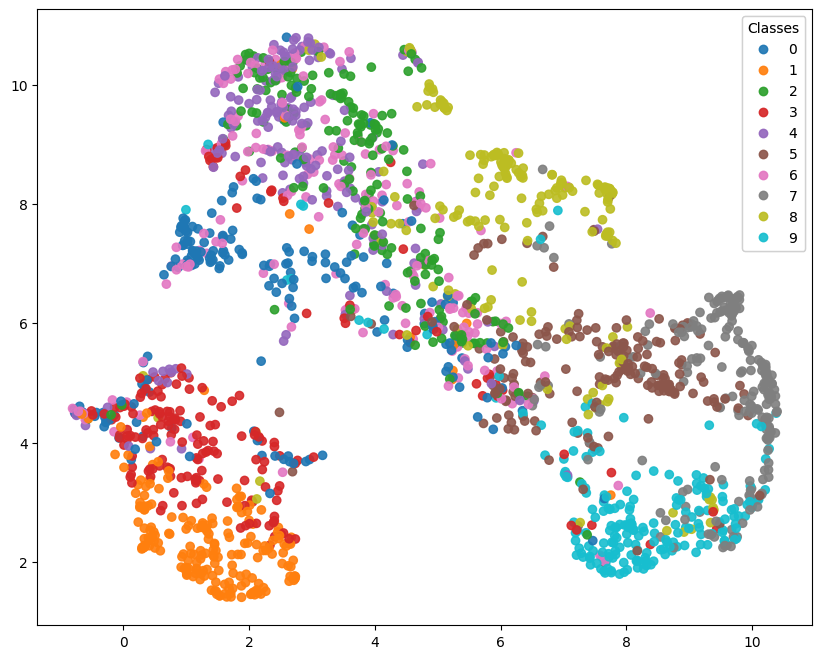

In [78]:
from sklearn.discriminant_analysis import StandardScaler

from sklearn.manifold import TSNE

import umap


def visualize():
  # Plot the encoded representations of the first 2000
  # images from `fm_train_set` on a plane.
  # You must first pass the images to
  # the encoder to get the encoded vectors, and then you
  # must transform these vectors to 2D space using TSNE
  # and plot the points.
  ##############################
  # Your code goes here (15 points)
  
  # umap_p = False
  umap_p = True
  
  n = 2000
  images = train_imgs[:n].unsqueeze(1)
  labels = fm_train_set.targets[:n]

  images = images.to(device)
  
  with torch.no_grad(), TorchModelMode(encoder, 'eval'):
    encoded_vectors = encoder(images)

  encoded_vectors = encoded_vectors.cpu().detach().numpy()

  encoded_vectors = StandardScaler().fit_transform(encoded_vectors)
  
  if umap_p:
    reducer = umap.UMAP()
    transformed_vectors = reducer.fit_transform(encoded_vectors)
  else:
    # tsne = TSNE(n_components=2, random_state=89)
    tsne = TSNE(n_components=2, random_state=89, learning_rate='auto', init='random', perplexity=30,)
    transformed_vectors = tsne.fit_transform(encoded_vectors)

  plt.figure(figsize=(10, 8))
  scatter = plt.scatter(transformed_vectors[:, 0], transformed_vectors[:, 1], c=labels, cmap='tab10', alpha=0.9)

  legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc="best")
  plt.gca().add_artist(legend1)

  plt.show()
  ##############################

# Testing the function
visualize()

In [79]:
torch_shape_get(next(iter(train_loader)))

[(torch.float32, torch.Size([128, 28, 28])),
 (torch.float32, torch.Size([128, 28, 28]))]

In [80]:
def train(n_epochs, optimizer, model, loss_fn, train_loader, scheduler=None):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            # Compute the output.
            # Use GPU for your data if possible.
            ##############################
            # Your code goes here (5 points)
            imgs = imgs.to(device).unsqueeze(1)
            labels = labels.to(device).unsqueeze(1)
            
            preds = model.forward(imgs)
            
            # ic(torch_shape_get(labels))
            # ic(torch_shape_get(preds))
            ##############################

            # Using `loss_fn` and `optimizer`, compute the loss and do the backprop step.
            ##############################
            # Your code goes here (5 points)
            loss = loss_fn(preds, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()
            ##############################
            
        loss_train = loss_train / len(train_loader)
        if scheduler:
            scheduler.step(loss_train)
            
        print('Epoch {}, Training loss {}'.format(epoch, loss_train))
        # Every 10 epochs, we visualize the encoded representations.
        if epoch % 10 == 0:
          visualize()

In [81]:
len(train_loader)

469

Epoch 1, Training loss 0.052641577379249814
Epoch 2, Training loss 0.0224634025579513
Epoch 3, Training loss 0.020032616963645798
Epoch 4, Training loss 0.018946952899413578
Epoch 5, Training loss 0.018098895038877214
Epoch 6, Training loss 0.017604265137633152
Epoch 7, Training loss 0.017204195292773786
Epoch 8, Training loss 0.016865488783176393
Epoch 9, Training loss 0.01661577922448929
Epoch 10, Training loss 0.016397338086512805


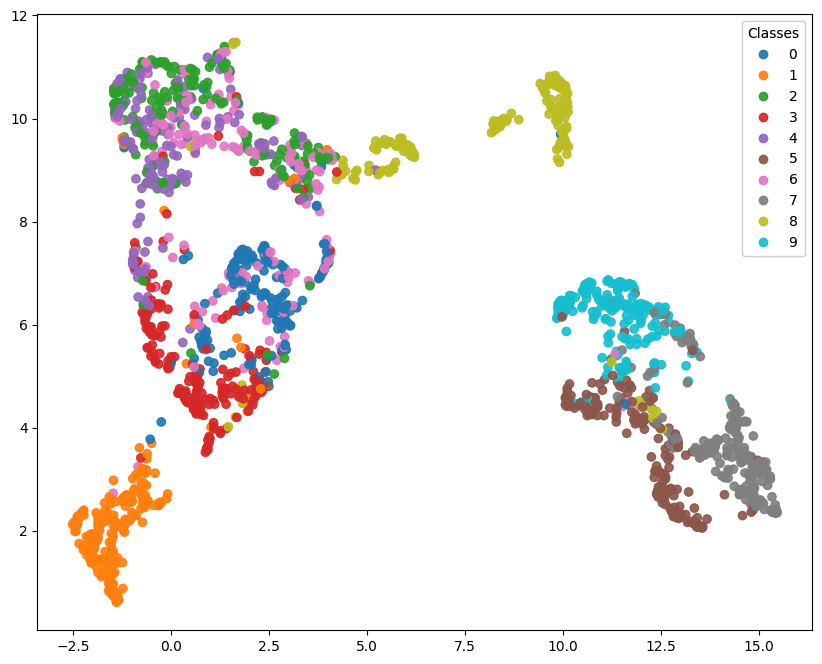

Epoch 11, Training loss 0.01620205163534707
Epoch 12, Training loss 0.016051983089446387
Epoch 13, Training loss 0.01595152666303776
Epoch 14, Training loss 0.015784151854116652
Epoch 15, Training loss 0.01568796115913498
Epoch 16, Training loss 0.015632289852986713
Epoch 17, Training loss 0.015484060260103837
Epoch 18, Training loss 0.015428578095840239
Epoch 19, Training loss 0.01535888644717713
Epoch 20, Training loss 0.015302795857222858


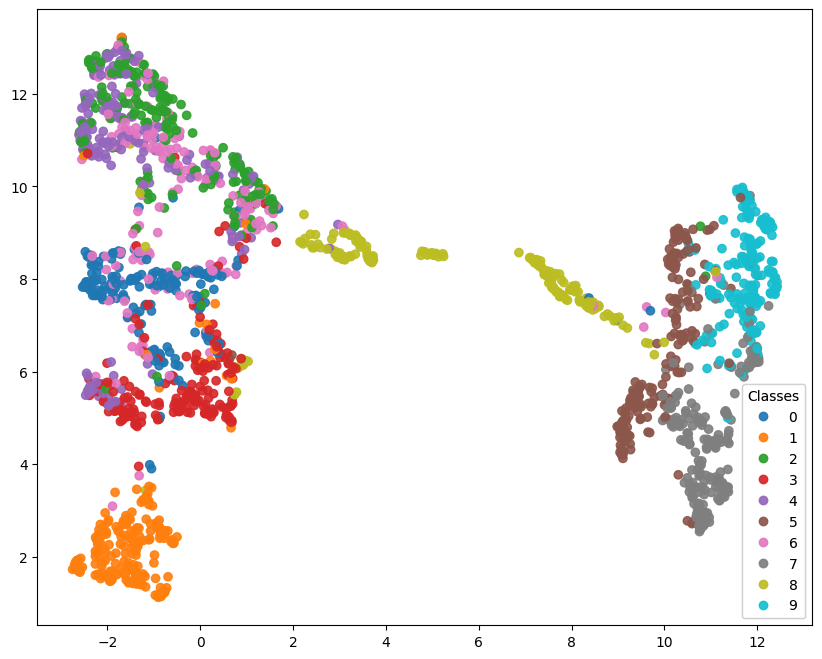

Epoch 21, Training loss 0.015207213717006417
Epoch 22, Training loss 0.015153750100099584
Epoch 23, Training loss 0.015098276462699813
Epoch 24, Training loss 0.015089392513116159
Epoch 25, Training loss 0.015013377174242601
Epoch 26, Training loss 0.014960593408914898
Epoch 27, Training loss 0.014897255995459775
Epoch 28, Training loss 0.0148633136701927
Epoch 29, Training loss 0.014850038898064256
Epoch 30, Training loss 0.014809898462202122


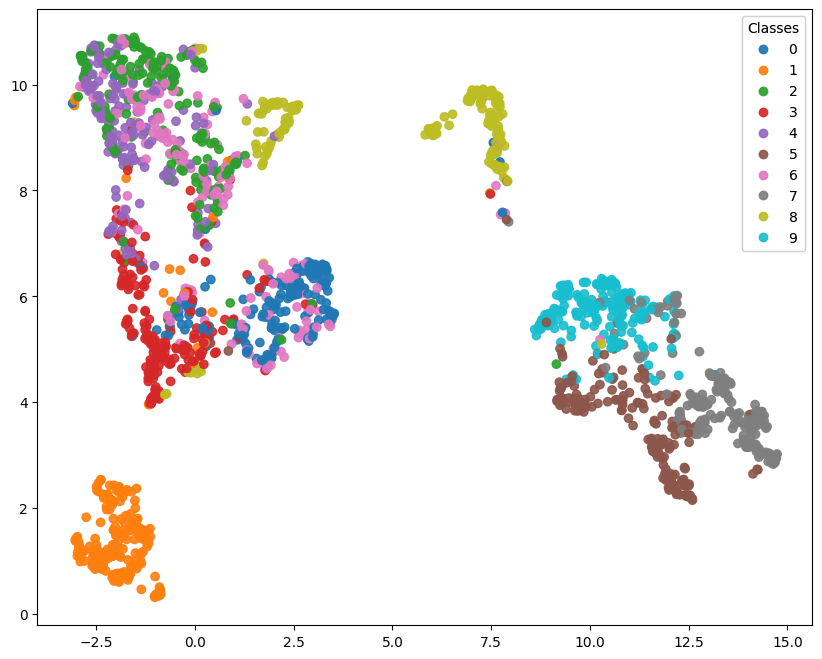

Epoch 31, Training loss 0.014759670931107199
Epoch 32, Training loss 0.014760060887188037
Epoch 33, Training loss 0.014704162298616315
Epoch 34, Training loss 0.01465930739469302
Epoch 35, Training loss 0.014632509004618568
Epoch 36, Training loss 0.014598125077561657
Epoch 37, Training loss 0.014560615560456888
Epoch 38, Training loss 0.014552195197038813
Epoch 39, Training loss 0.014513393887864755
Epoch 40, Training loss 0.014514121181293846


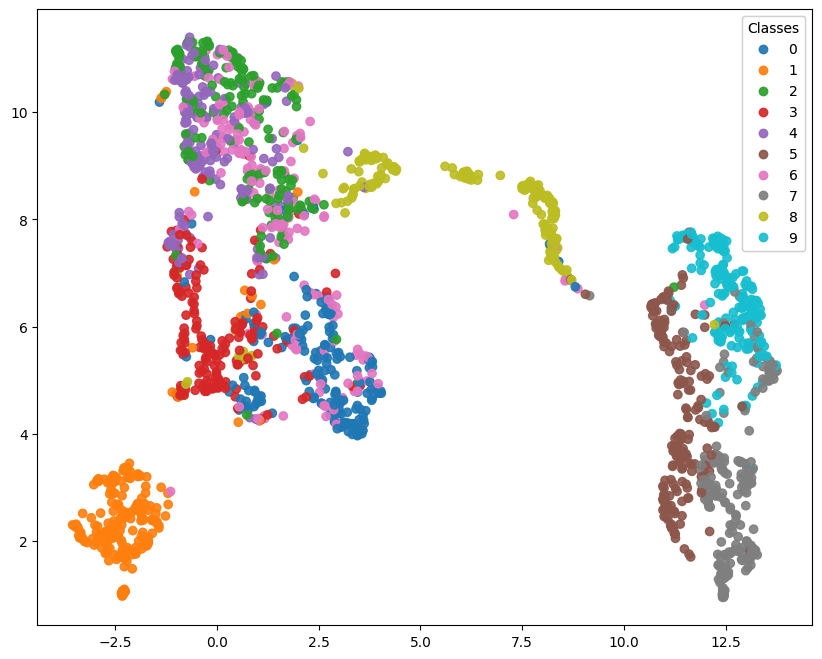

Epoch 41, Training loss 0.014502487530602194
Epoch 42, Training loss 0.014486904325547502
Epoch 43, Training loss 0.014425916394699357
Epoch 44, Training loss 0.014429009259382545
Epoch 45, Training loss 0.014388139037959484
Epoch 46, Training loss 0.01438772330271092
Epoch 47, Training loss 0.01435640174895525
Epoch 48, Training loss 0.014329771689975313
Epoch 49, Training loss 0.014329204824306309
Epoch 50, Training loss 0.01429521333751902


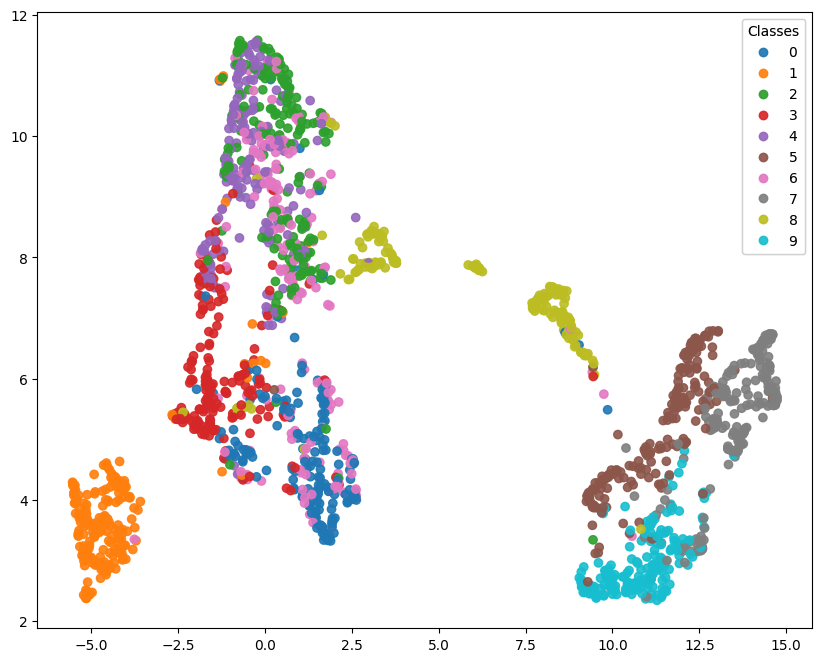

Epoch 51, Training loss 0.014291966919785242
Epoch 52, Training loss 0.014256358668922997
Epoch 53, Training loss 0.01425208161467873
Epoch 54, Training loss 0.014237157182335092
Epoch 55, Training loss 0.014228639294153083
Epoch 56, Training loss 0.014212730896673095
Epoch 57, Training loss 0.014198767718301017
Epoch 58, Training loss 0.014161250609626521
Epoch 59, Training loss 0.014157286980179455
Epoch 60, Training loss 0.014171086589315299


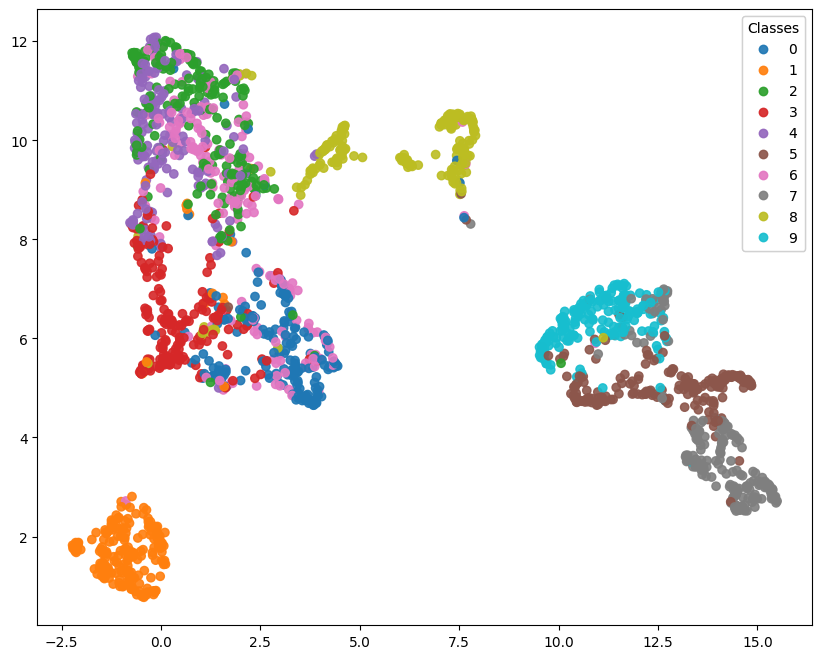

Epoch 61, Training loss 0.01414440001553691
Epoch 62, Training loss 0.014113346762113226
Epoch 63, Training loss 0.014079675457672651
Epoch 64, Training loss 0.014110843446463156
Epoch 65, Training loss 0.014124520166691686
Epoch 66, Training loss 0.01406224523740473
Epoch 67, Training loss 0.014054996036946266
Epoch 68, Training loss 0.014073263393091494
Epoch 69, Training loss 0.014045751208800878
Epoch 70, Training loss 0.014053038915178414


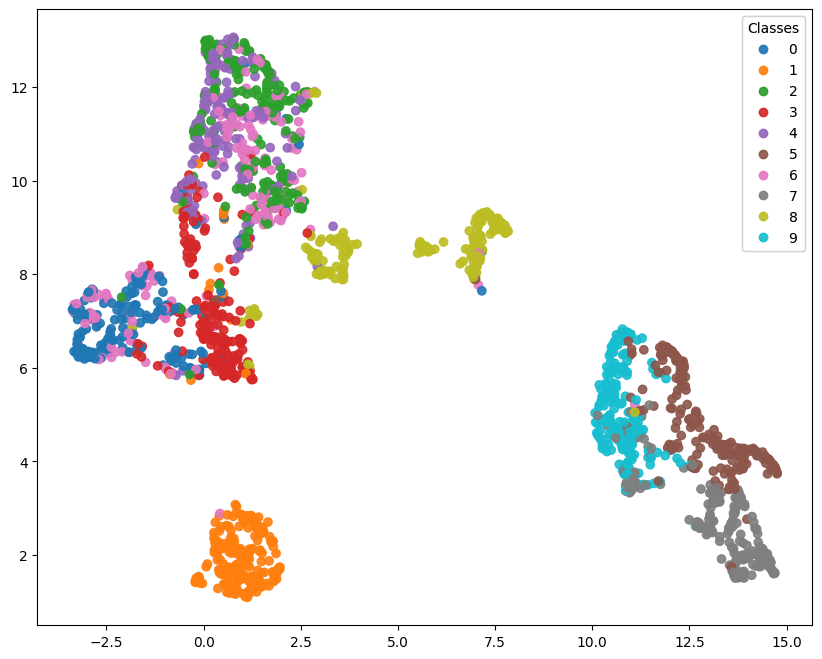

Epoch 71, Training loss 0.014032339000069638
Epoch 72, Training loss 0.014010839029225204
Epoch 73, Training loss 0.013987160551903853
Epoch 74, Training loss 0.014007208199659263
Epoch 75, Training loss 0.014017840275473432
Epoch 76, Training loss 0.013986133664512812
Epoch 77, Training loss 0.013956107775063148
Epoch 78, Training loss 0.013959995405410907
Epoch 79, Training loss 0.01394888638917889
Epoch 80, Training loss 0.013938558863789668


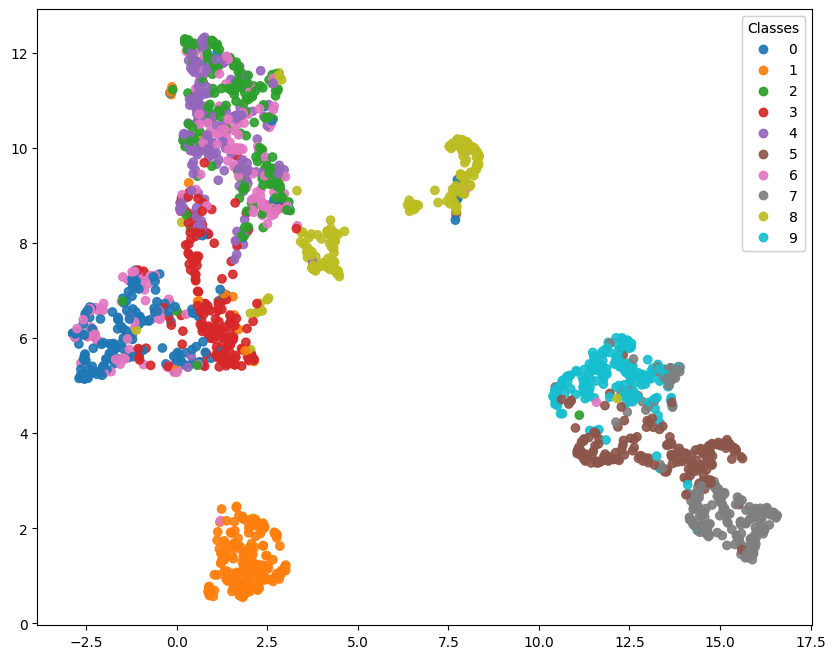

Epoch 81, Training loss 0.01396372194475393
Epoch 82, Training loss 0.013951756280543072
Epoch 83, Training loss 0.013912560291159382
Epoch 84, Training loss 0.013892873073183397
Epoch 85, Training loss 0.013914013070973761
Epoch 86, Training loss 0.013912675890332854
Epoch 87, Training loss 0.013877507473931893
Epoch 88, Training loss 0.013884180692086088
Epoch 89, Training loss 0.013882521236104879
Epoch 90, Training loss 0.013868139274338923


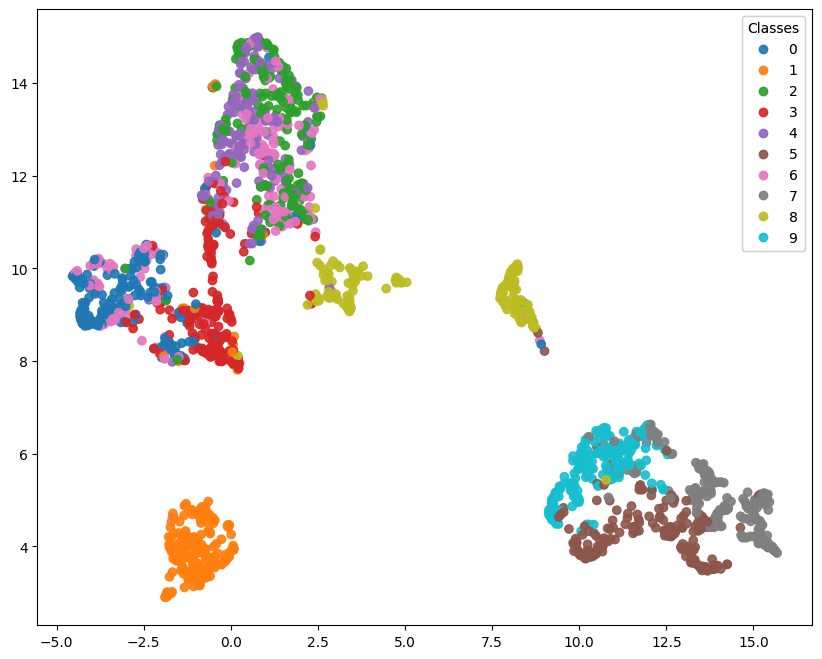

Epoch 91, Training loss 0.013845103606184536
Epoch 92, Training loss 0.013852583198770405
Epoch 93, Training loss 0.013862500574860746
Epoch 94, Training loss 0.013820858513400244
Epoch 95, Training loss 0.013835439512105004
Epoch 96, Training loss 0.013824734874546274
Epoch 97, Training loss 0.013811563562625634
Epoch 98, Training loss 0.013802073089711701
Epoch 99, Training loss 0.013800619299144251
Epoch 100, Training loss 0.013772856336889237


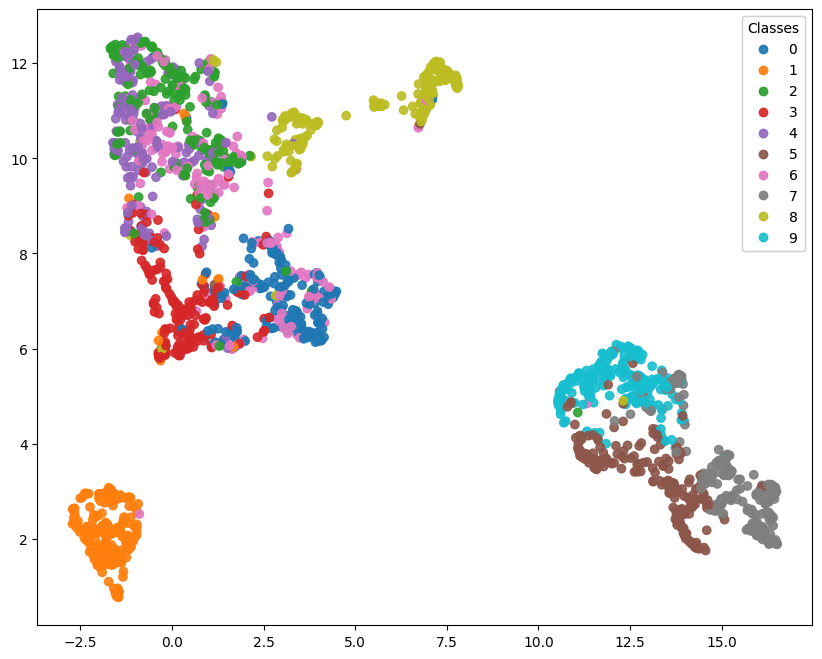

Epoch 101, Training loss 0.01380113182243889
Epoch 102, Training loss 0.01378904643859754
Epoch 103, Training loss 0.013806737087635216
Epoch 104, Training loss 0.013759051459525693
Epoch 105, Training loss 0.013765206113695971
Epoch 106, Training loss 0.013767899280147893
Epoch 107, Training loss 0.013763005511640614
Epoch 108, Training loss 0.013726946584054276
Epoch 109, Training loss 0.013739049309558833
Epoch 110, Training loss 0.013728511994327309


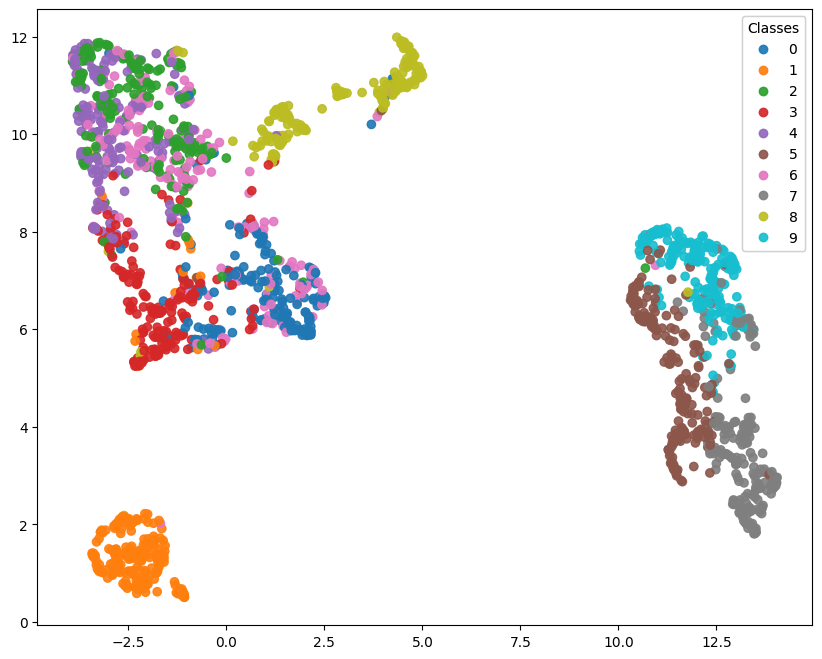

Epoch 111, Training loss 0.013726386043038576
Epoch 112, Training loss 0.013711396596833333
Epoch 113, Training loss 0.01372862862609724
Epoch 114, Training loss 0.013709381790652966
Epoch 115, Training loss 0.013699681065214088
Epoch 116, Training loss 0.013702424642230784
Epoch 117, Training loss 0.013681980302688409
Epoch 118, Training loss 0.013671610837996895
Epoch 119, Training loss 0.01365655267051161
Epoch 120, Training loss 0.01368971005169504


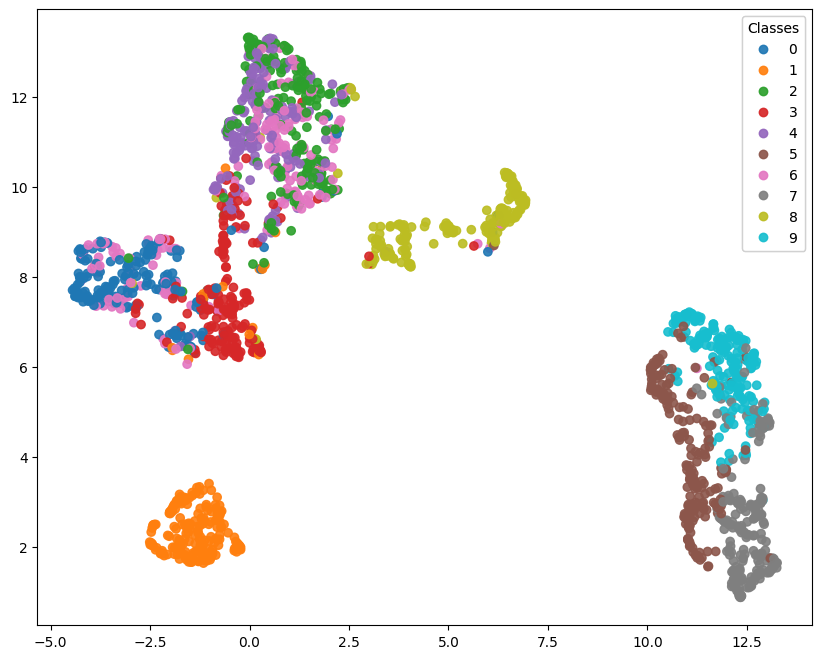

Epoch 121, Training loss 0.013664037954292572
Epoch 122, Training loss 0.013683913607221803
Epoch 123, Training loss 0.01365046357430184
Epoch 124, Training loss 0.013674043692839043
Epoch 125, Training loss 0.013669822434547231
Epoch 126, Training loss 0.013645725900621047
Epoch 127, Training loss 0.013625383809971402
Epoch 128, Training loss 0.013623465777936775
Epoch 129, Training loss 0.01360441795163063
Epoch 130, Training loss 0.013638134104515445


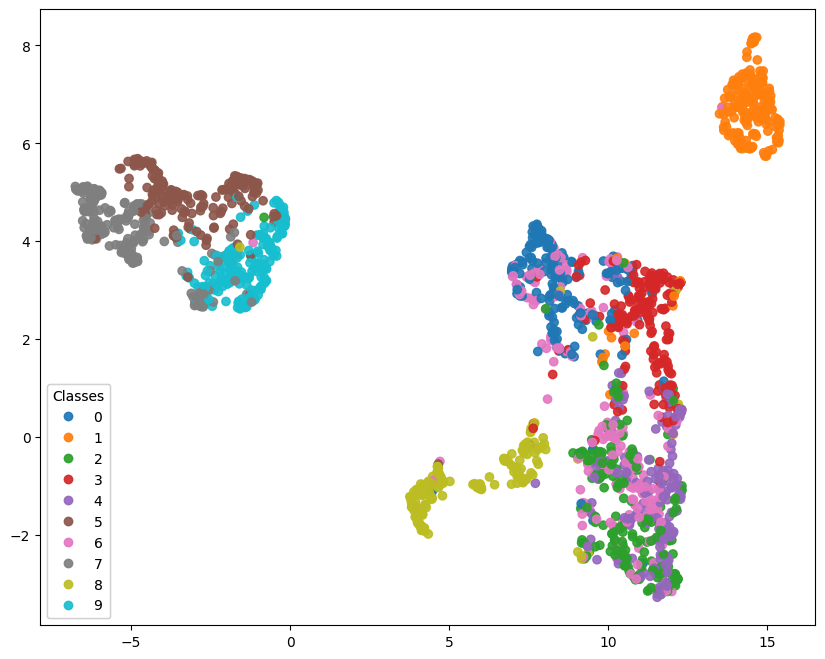

Epoch 131, Training loss 0.013606989853528898
Epoch 132, Training loss 0.013601677565734143
Epoch 133, Training loss 0.013600455078759045
Epoch 134, Training loss 0.013603003232924541
Epoch 135, Training loss 0.013580131016846405
Epoch 136, Training loss 0.01360824258366564
Epoch 137, Training loss 0.013597888667493868
Epoch 138, Training loss 0.013583691441205773
Epoch 139, Training loss 0.01356068866720586
Epoch 140, Training loss 0.013570616375218067


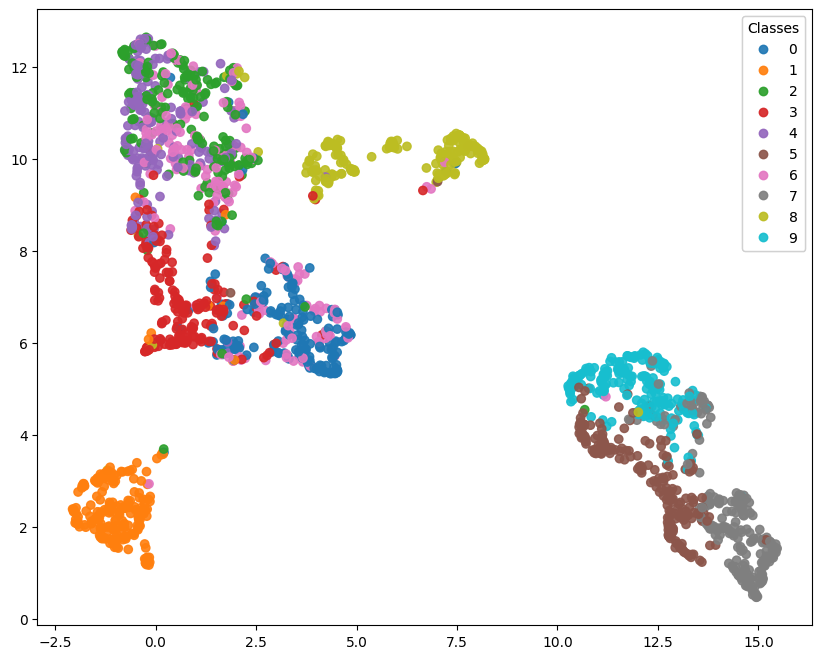

Epoch 141, Training loss 0.013561446408330123
Epoch 142, Training loss 0.01354783366936674
Epoch 143, Training loss 0.013580573484428655
Epoch 144, Training loss 0.013536564836989461
Epoch 145, Training loss 0.013544007446736034
Epoch 146, Training loss 0.013531878193431317
Epoch 147, Training loss 0.013531182654329073
Epoch 148, Training loss 0.013527548762717482
Epoch 149, Training loss 0.013514959328829734
Epoch 150, Training loss 0.013509685672057082


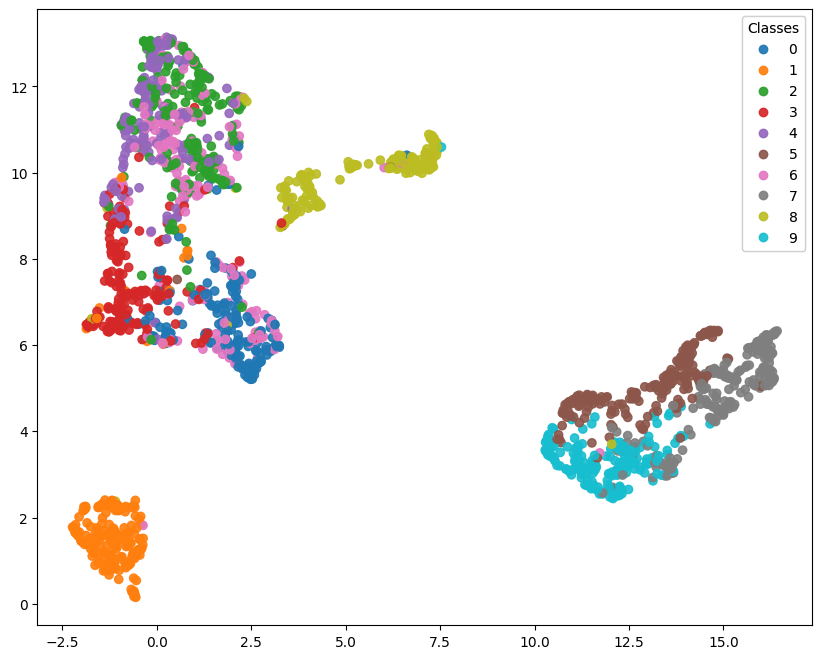

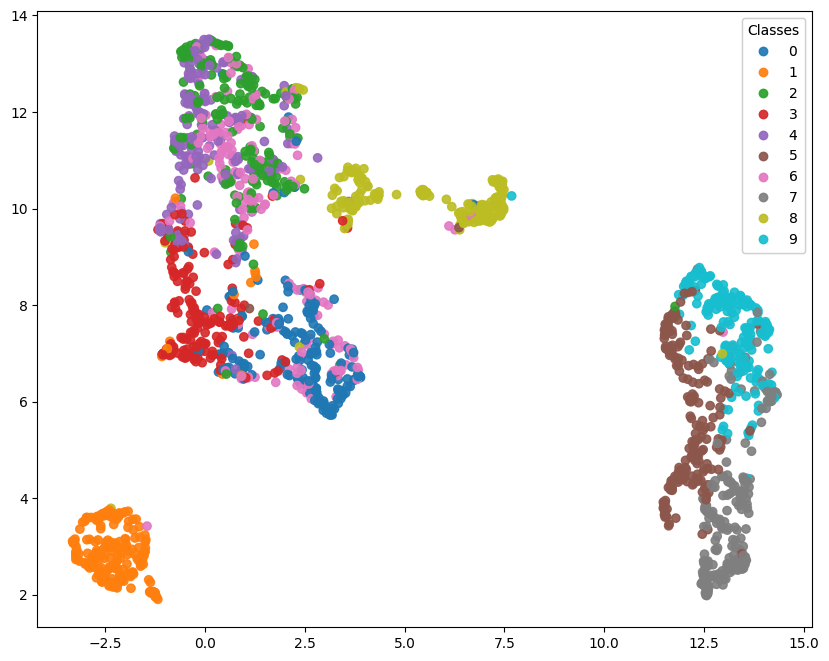

In [82]:
epochs = 150

# Train the DAE. use MSE as the loss function and 
# use Adam for the optimizer. Set the learning rate to 1e-3.
##############################
# Your code goes here (5 points)
from torch.optim.lr_scheduler import ReduceLROnPlateau

loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(DAE.parameters(), 
                             lr=1e-3,
                            #  lr=1e-2,
                            #  lr=1e-1,
                             )
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, cooldown=2, verbose=True)
##############################
train(epochs, optimizer, DAE, loss_fn, train_loader, scheduler=scheduler)

visualize()
##############################

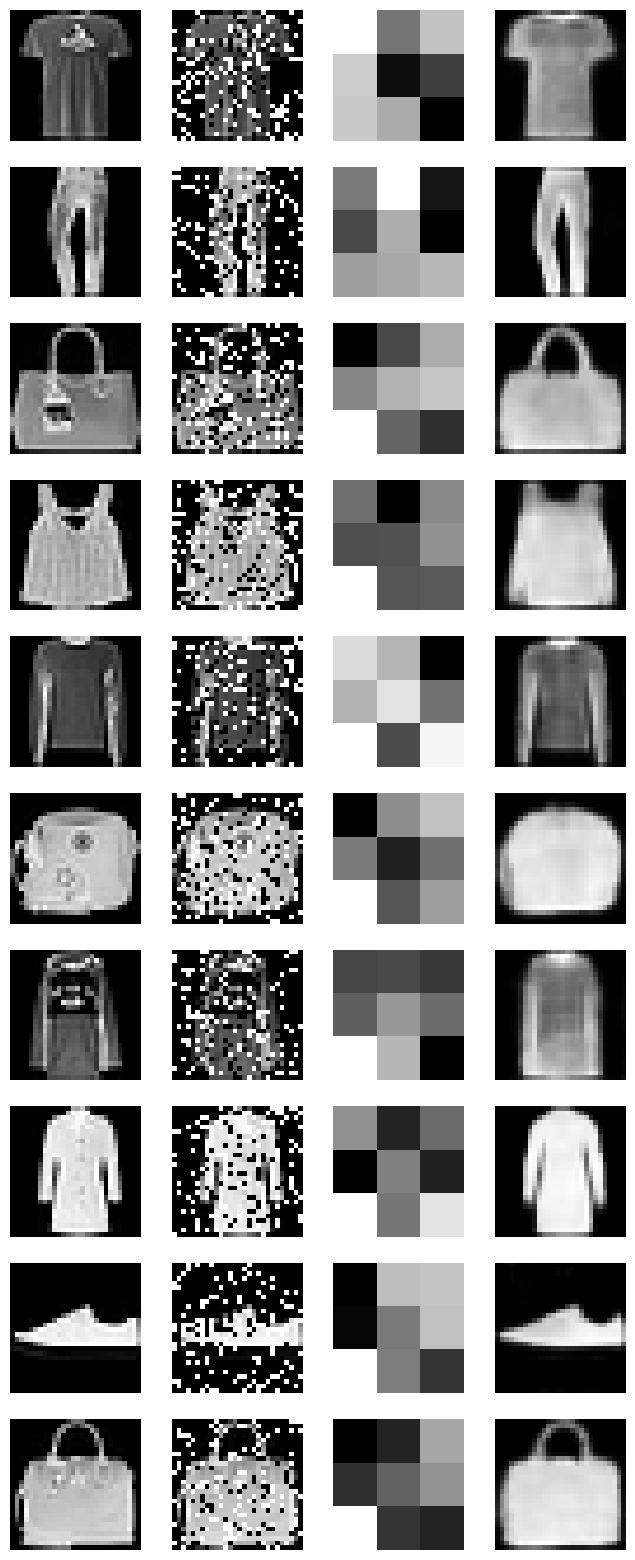

In [84]:
# Use 10 examples from the testing set to evaluate the 
# DAE's outputs visually.
##############################
# Your code goes here (5 points)

f, axs = plt.subplots(10, 4, figsize=(8, 20))


counter = 0
for imgs, labels in test_loader_b1:
  imgs = imgs.to(device).unsqueeze(1)
  #: imgs has shape [128, 1, 28, 28]
  labels = labels.to(device).unsqueeze(1)
  #: labels has shape [128, 1, 28, 28]

  # ic(torch_shape_get(imgs))
  # ic(torch_shape_get(labels))

  with torch.no_grad(), TorchModelMode(encoder, 'eval'), TorchModelMode(decoder, 'eval'):
    latents = encoder.forward(imgs)
    # ic(torch_shape_get(latents))
    preds = decoder.forward(latents)

  axs[counter, 0].imshow(labels[0].cpu().detach().numpy().squeeze(), cmap='gray')
  axs[counter, 1].imshow(imgs[0].cpu().detach().numpy().squeeze(), cmap='gray')
  axs[counter, 2].imshow(latents[0].cpu().detach().numpy().squeeze()[:9].reshape((3, 3)), cmap='gray')
  axs[counter, 3].imshow(preds[0].cpu().detach().numpy().squeeze(), cmap='gray')

  axs[counter, 0].axis('off')
  axs[counter, 1].axis('off')
  axs[counter, 2].axis('off')
  axs[counter, 3].axis('off')

  counter += 1
  if counter >= 10:
    break

plt.show()
#############################

# tmp